<a href="https://colab.research.google.com/github/yuyangweng/Project/blob/main/peak_fitting_pseudo_voigt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 292 kB 29.8 MB/s 
     |████████████████████████████████| 98 kB 10.0 MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84413 sha256=f980ab1ebc9b07b44bb4cfc1df3fbe26db0d09597a3eeadb4a04f9aa6cbe60d3
  Stored in directory: /root/.cache/pip/wheels/b9/7a/d1/236aa0f8196b264fda481a112f7cfb1bfde7bfb20235f8e331
Successfully built lmfit


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from lmfit import Model
from numpy import exp, pi, sqrt
import matplotlib.pyplot as plt
from lmfit.models import PseudoVoigtModel
from scipy.signal import find_peaks,peak_widths

In [5]:
data_path = '/content/drive/MyDrive/THK-reload-1_2.csv'
headers = ['raman_shift', 'intensity']
df = pd.read_csv(data_path, names=headers)

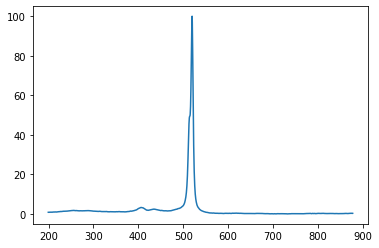

In [6]:
plt.plot(df.raman_shift,df.intensity)

[[Model]]
    ((Model(pvoigt, prefix='pv_1') + Model(pvoigt, prefix='pv_2')) + Model(pvoigt, prefix='pv_3'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10989
    # data points      = 1749
    # variables        = 12
    chi-square         = 1675.42878
    reduced chi-square = 0.96455313
    Akaike info crit   = -51.1634077
    Bayesian info crit = 14.4381860
##  Warning: uncertainties could not be estimated:
    pv_1fraction:   at boundary
    pv_2fraction:   at boundary
    pv_3fraction:   at boundary
[[Variables]]
    pv_1amplitude:  725.438429 (init = 1236.759)
    pv_1center:     513.396618 (init = 518.8759)
    pv_1sigma:      4.65245955 (init = 3.298024)
    pv_1fraction:   1.00000000 (init = 0.5)
    pv_1fwhm:       9.30491910 == '2.0000000*pv_1sigma'
    pv_1height:     49.6327204 == '(((1-pv_1fraction)*pv_1amplitude)/max(1e-15, (pv_1sigma*sqrt(pi/log(2))))+(pv_1fraction*pv_1amplitude)/max(1e-15, (pi*pv_1sigma)))'
    pv_2amplitude: -470.064665

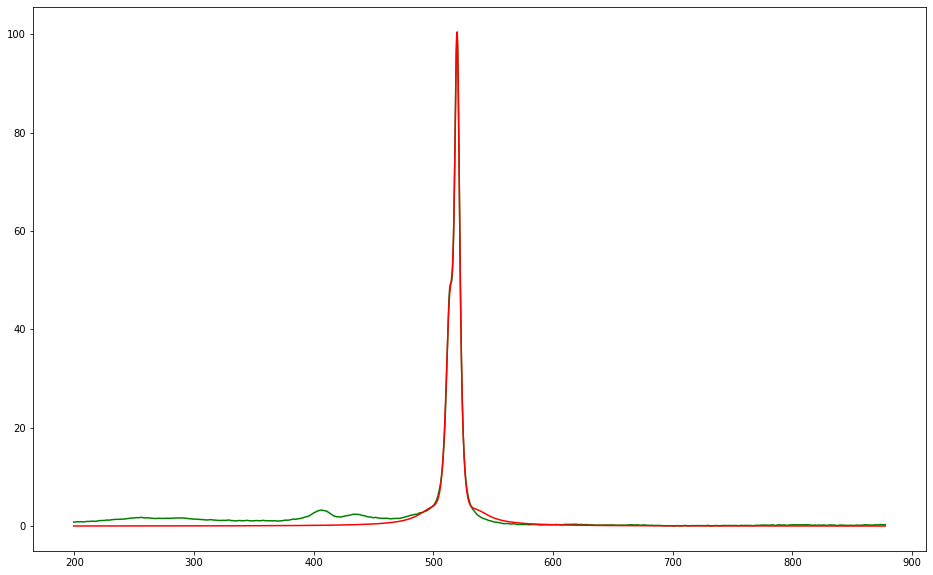

<Figure size 432x288 with 0 Axes>

In [42]:
x=df.raman_shift
y=df.intensity


pv_model_1 = PseudoVoigtModel(prefix='pv_1')
pv_model_2 = PseudoVoigtModel(prefix='pv_2')
pv_model_3 = PseudoVoigtModel(prefix='pv_3')

pars_1 = pv_model_1.guess(y, x=x)
pars_2 = pv_model_2.guess(y, x=x)
pars_3 = pv_model_3.guess(y, x=x)
pars=pars_1+pars_2+pars_3
 

pseudo_voigt_model=pv_model_1+pv_model_2+pv_model_3
result = pseudo_voigt_model.fit(y, pars, x=x)
print(result.fit_report())


plt.figure(figsize=(16, 10))
plt.plot(x, y,'g')
plt.plot(x, result.best_fit, 'r-',label='best fit ')

plt.show()
plt.savefig("result.png")